In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My\ Drive/hbi2019

/content/gdrive/My Drive/hbi2019


In [0]:
ls

ecoli/       sra_food/                           test_references/
Gmax/        sratoolkit.2.9.4-1-ubuntu64/        test_sra/
references/  sratoolkit.current-ubuntu64.tar.gz
sra/         SRR5470223.vcf.gz.mv.vcf


**we will use well deposite soybean database (soybase.org)**
* Data > G.max Data Store (https://soybase.org/data/public/Glycine_max/Wm82.gnm2.div.S3DM/)
* Wm82.gnm1.div.0sXV > we can see many data
* Wm82.gnm1.div.QXZK is also good data, but too large
* Wm82.gnm2.div.S3DM click > we need to download vcf.gz data > 링크주소복사 (https://soybase.org/data/public/Glycine_max/Wm82.gnm2.div.S3DM/glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz)

In [0]:
mkdir Gmax

In [0]:
cd Gmax

/content/gdrive/My Drive/hbi2019/Gmax


In [0]:
! wget https://soybase.org/data/public/Glycine_max/Wm82.gnm2.div.S3DM/glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz

--2020-02-13 08:30:13--  https://soybase.org/data/public/Glycine_max/Wm82.gnm2.div.S3DM/glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz
Resolving soybase.org (soybase.org)... 129.186.136.129
Connecting to soybase.org (soybase.org)|129.186.136.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26739422 (26M) [application/x-gzip]
Saving to: ‘glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz’

glyma.Wm82.gnm2.div 100%[===================>]  25.50M  6.70MB/s    in 6.9s    

2020-02-13 08:30:21 (3.70 MB/s) - ‘glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz’ saved [26739422/26739422]



In [0]:
! wget https://soybase.org/data/public/Glycine_max/Wm82.gnm2.div.S3DM/glyma.Wm82.gnm2.div.S3DM.CultivarList.txt.gz

--2020-02-13 08:30:22--  https://soybase.org/data/public/Glycine_max/Wm82.gnm2.div.S3DM/glyma.Wm82.gnm2.div.S3DM.CultivarList.txt.gz
Resolving soybase.org (soybase.org)... 129.186.136.129
Connecting to soybase.org (soybase.org)|129.186.136.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3231 (3.2K) [application/x-gzip]
Saving to: ‘glyma.Wm82.gnm2.div.S3DM.CultivarList.txt.gz’

glyma.Wm82.gnm2.div 100%[===================>]   3.16K  --.-KB/s    in 0s      

2020-02-13 08:30:23 (96.2 MB/s) - ‘glyma.Wm82.gnm2.div.S3DM.CultivarList.txt.gz’ saved [3231/3231]



In [0]:
import pandas as pd
import numpy as np

In [0]:
df_vcf = pd.read_csv('./glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz', compression = 'gzip', comment = '#', sep = '\t', header = None)

# gzip = gz file 압축풀어줌

In [0]:
df_vcf.head()

# chromosome, position, ID, REF, ALT ...와 같은 column 필요

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382
0,Gm01,24163,S1_24163,C,A,.,PASS,QualityScore=0.0;DP=934,GT:AD:DP:GQ:PL,"0/0:1,0:1:66:0,3,36","0/0:3,0:3:88:0,9,108","./.:0,0:0","0/0:1,0:1:66:0,3,36","./.:0,0:0","0/0:2,0:2:79:0,6,72","./.:0,0:0","./.:0,0:0","0/0:2,0:2:79:0,6,72","0/0:5,0:5:96:0,15,180","0/0:3,0:3:88:0,9,108","0/0:1,0:1:66:0,3,36","0/0:2,0:2:79:0,6,72","0/0:3,0:3:88:0,9,108","0/0:2,0:2:79:0,6,72","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:2,0:2:79:0,6,72","0/0:5,0:5:96:0,15,180","0/0:1,0:1:66:0,3,36","0/0:3,0:3:88:0,9,108","./.:0,0:0","0/0:2,0:2:79:0,6,72","0/0:5,0:5:96:0,15,180","./.:0,0:0","./.:0,0:0",...,"0/0:4,0:4:94:0,12,144","0/0:3,0:3:88:0,9,108","0/0:3,0:3:88:0,9,108","0/0:3,0:3:88:0,9,108","./.:0,0:0","0/0:4,0:4:94:0,12,144","0/0:3,0:3:88:0,9,108","0/0:1,0:1:66:0,3,36","0/0:8,0:8:99:0,24,255","0/0:5,0:5:96:0,15,180","0/0:2,0:2:79:0,6,72","0/0:4,0:4:94:0,12,144","./.:0,0:0","0/0:7,0:7:99:0,21,252","./.:0,0:0","0/0:4,0:4:94:0,12,144","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:2,0:2:79:0,6,72","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:4,0:4:94:0,12,144","0/0:4,0:4:94:0,12,144","0/0:4,0:4:94:0,12,144","0/0:2,0:2:79:0,6,72","0/0:6,0:6:98:0,18,216","./.:0,0:0","./.:0,0:0","0/0:3,0:3:88:0,9,108","1/0:1,1:2:99:30,0,30","1/1:0,4:4:94:144,12,0","0/0:9,0:9:99:0,27,255","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36"
1,Gm01,45854,S1_45854,A,G,.,PASS,QualityScore=0.0;DP=399,GT:AD:DP:GQ:PL,"./.:0,0:0","0/0:5,0:5:96:0,15,180","./.:0,0:0","0/0:2,0:2:79:0,6,72","./.:0,0:0","0/0:1,0:1:66:0,3,36","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:3,0:3:88:0,9,108","./.:0,0:0","./.:0,0:0","1/1:0,4:4:94:144,12,0","1/1:0,3:3:88:108,9,0","./.:0,0:0","./.:0,0:0","1/1:0,4:4:94:144,12,0","0/0:1,0:1:66:0,3,36","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","1/1:0,2:2:79:72,6,0","./.:0,0:0","./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:4,0:4:94:0,12,144","./.:0,0:0","./.:0,0:0",...,"0/0:3,0:3:88:0,9,108","0/1:2,1:3:99:27,0,63","./.:0,0:0","./.:0,0:0","0/0:3,0:3:88:0,9,108","0/0:3,0:3:88:0,9,108","1/1:0,1:1:66:36,3,0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:3,0:3:88:0,9,108","./.:0,0:0","1/1:0,3:3:88:108,9,0","1/1:0,1:1:66:36,3,0","1/1:0,2:2:79:72,6,0","./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","0/0:2,0:2:79:0,6,72","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","0/0:1,0:1:66:0,3,36","1/1:0,3:3:88:108,9,0","1/1:0,4:4:94:144,12,0","0/0:2,0:2:79:0,6,72","0/0:3,0:3:88:0,9,108","0/0:2,0:2:79:0,6,72","1/1:0,1:1:66:36,3,0","1/1:0,2:2:79:72,6,0","1/1:0,3:3:88:108,9,0","1/1:0,3:3:88:108,9,0","0/0:2,0:2:79:0,6,72","0/0:1,0:1:66:0,3,36","1/1:0,1:1:66:36,3,0","1/1:0,1:1:66:36,3,0"
2,Gm01,81402,S1_81402,T,C,.,PASS,QualityScore=0.0;DP=132,GT:AD:DP:GQ:PL,"./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","1/1:0,3:3:88:108,9,0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","0/1:5,1:6:98:18,0,162","./.:0,0:0","./.:0,0:0",...,"./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","./.:0,0:0","./.:0,0:0","1/0:1,1:2:99:30,0,30","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","0/1:10,8:18:100:234,0,255","./.:0,0:0","1/1:0,1:1:66:36,3,0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./

In [0]:
c = ! zcat ./glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz | grep '#' | tail -1

In [0]:
c

['#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO\tFORMAT\t56-1\t56-2\t2\t3\t6\t7\t8\t9\t55-1\t55-2\t5-1\t5-2\t54-1\t54-2\t403\t406\t407\t243-1\t243-2\t410\t419\t420\t421\t300\t301\t422\t302\t423\t424\t303\t304\t426\t305\t306\t428\t307\t429\t308\t61-1\t430\t431\t310\t169-2\t311\t169-1\t432\t312\t433\t434\t313\t1-1\t1-2\t315\t316\t317\t319\t320\t200\t321\t201\t322\t323\t202\t324\t203\t325\t204\t326\t327\t206\t61-2\t328\t207\t329\t209\t60-2\t60-1\t330\t331\t210\t211\t333\t212\t334\t213\t335\t214\t215\t336\t216\t338\t217\t339\t218\t219\t341\t220\t100\t221\t342\t101\t222\t102\t223\t344\t224\t345\t103\t225\t346\t347\t105\t106\t348\t349\t109\t208-2\t208-1\t350\t351\t231\t352\t110\t232\t353\t111\t354\t112\t233\t113\t355\t234\t114\t356\t235\t115\t236\t357\t358\t237\t117\t239\t118\t119\t10\t11\t12\t13\t14\t15\t16\t17\t19\t240\t361\t241\t120\t363\t121\t242\t122\t364\t365\t123\t244\t245\t366\t124\t367\t125\t247\t368\t126\t127\t369\t248\t249\t129\t29-2\t29-1\t20\t21\t22\t23\t24\t25\t26\t27\t28\t370\

In [0]:
c[0].split('\t')

['#CHROM',
 'POS',
 'ID',
 'REF',
 'ALT',
 'QUAL',
 'FILTER',
 'INFO',
 'FORMAT',
 '56-1',
 '56-2',
 '2',
 '3',
 '6',
 '7',
 '8',
 '9',
 '55-1',
 '55-2',
 '5-1',
 '5-2',
 '54-1',
 '54-2',
 '403',
 '406',
 '407',
 '243-1',
 '243-2',
 '410',
 '419',
 '420',
 '421',
 '300',
 '301',
 '422',
 '302',
 '423',
 '424',
 '303',
 '304',
 '426',
 '305',
 '306',
 '428',
 '307',
 '429',
 '308',
 '61-1',
 '430',
 '431',
 '310',
 '169-2',
 '311',
 '169-1',
 '432',
 '312',
 '433',
 '434',
 '313',
 '1-1',
 '1-2',
 '315',
 '316',
 '317',
 '319',
 '320',
 '200',
 '321',
 '201',
 '322',
 '323',
 '202',
 '324',
 '203',
 '325',
 '204',
 '326',
 '327',
 '206',
 '61-2',
 '328',
 '207',
 '329',
 '209',
 '60-2',
 '60-1',
 '330',
 '331',
 '210',
 '211',
 '333',
 '212',
 '334',
 '213',
 '335',
 '214',
 '215',
 '336',
 '216',
 '338',
 '217',
 '339',
 '218',
 '219',
 '341',
 '220',
 '100',
 '221',
 '342',
 '101',
 '222',
 '102',
 '223',
 '344',
 '224',
 '345',
 '103',
 '225',
 '346',
 '347',
 '105',
 '106',
 '348',


In [0]:
c = c[0].split('\t')

In [0]:
df_vcf.columns = c

In [0]:
df_vcf.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,...,83,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2
0,Gm01,24163,S1_24163,C,A,.,PASS,QualityScore=0.0;DP=934,GT:AD:DP:GQ:PL,"0/0:1,0:1:66:0,3,36","0/0:3,0:3:88:0,9,108","./.:0,0:0","0/0:1,0:1:66:0,3,36","./.:0,0:0","0/0:2,0:2:79:0,6,72","./.:0,0:0","./.:0,0:0","0/0:2,0:2:79:0,6,72","0/0:5,0:5:96:0,15,180","0/0:3,0:3:88:0,9,108","0/0:1,0:1:66:0,3,36","0/0:2,0:2:79:0,6,72","0/0:3,0:3:88:0,9,108","0/0:2,0:2:79:0,6,72","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:2,0:2:79:0,6,72","0/0:5,0:5:96:0,15,180","0/0:1,0:1:66:0,3,36","0/0:3,0:3:88:0,9,108","./.:0,0:0","0/0:2,0:2:79:0,6,72","0/0:5,0:5:96:0,15,180","./.:0,0:0","./.:0,0:0",...,"0/0:4,0:4:94:0,12,144","0/0:3,0:3:88:0,9,108","0/0:3,0:3:88:0,9,108","0/0:3,0:3:88:0,9,108","./.:0,0:0","0/0:4,0:4:94:0,12,144","0/0:3,0:3:88:0,9,108","0/0:1,0:1:66:0,3,36","0/0:8,0:8:99:0,24,255","0/0:5,0:5:96:0,15,180","0/0:2,0:2:79:0,6,72","0/0:4,0:4:94:0,12,144","./.:0,0:0","0/0:7,0:7:99:0,21,252","./.:0,0:0","0/0:4,0:4:94:0,12,144","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:2,0:2:79:0,6,72","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:4,0:4:94:0,12,144","0/0:4,0:4:94:0,12,144","0/0:4,0:4:94:0,12,144","0/0:2,0:2:79:0,6,72","0/0:6,0:6:98:0,18,216","./.:0,0:0","./.:0,0:0","0/0:3,0:3:88:0,9,108","1/0:1,1:2:99:30,0,30","1/1:0,4:4:94:144,12,0","0/0:9,0:9:99:0,27,255","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36"
1,Gm01,45854,S1_45854,A,G,.,PASS,QualityScore=0.0;DP=399,GT:AD:DP:GQ:PL,"./.:0,0:0","0/0:5,0:5:96:0,15,180","./.:0,0:0","0/0:2,0:2:79:0,6,72","./.:0,0:0","0/0:1,0:1:66:0,3,36","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:3,0:3:88:0,9,108","./.:0,0:0","./.:0,0:0","1/1:0,4:4:94:144,12,0","1/1:0,3:3:88:108,9,0","./.:0,0:0","./.:0,0:0","1/1:0,4:4:94:144,12,0","0/0:1,0:1:66:0,3,36","./.:0,0:0","./.:0,0:0","0/0:1,0:1:66:0,3,36","1/1:0,2:2:79:72,6,0","./.:0,0:0","./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:4,0:4:94:0,12,144","./.:0,0:0","./.:0,0:0",...,"0/0:3,0:3:88:0,9,108","0/1:2,1:3:99:27,0,63","./.:0,0:0","./.:0,0:0","0/0:3,0:3:88:0,9,108","0/0:3,0:3:88:0,9,108","1/1:0,1:1:66:36,3,0","./.:0,0:0","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:1,0:1:66:0,3,36","0/0:3,0:3:88:0,9,108","./.:0,0:0","1/1:0,3:3:88:108,9,0","1/1:0,1:1:66:36,3,0","1/1:0,2:2:79:72,6,0","./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","0/0:2,0:2:79:0,6,72","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","0/0:1,0:1:66:0,3,36","1/1:0,3:3:88:108,9,0","1/1:0,4:4:94:144,12,0","0/0:2,0:2:79:0,6,72","0/0:3,0:3:88:0,9,108","0/0:2,0:2:79:0,6,72","1/1:0,1:1:66:36,3,0","1/1:0,2:2:79:72,6,0","1/1:0,3:3:88:108,9,0","1/1:0,3:3:88:108,9,0","0/0:2,0:2:79:0,6,72","0/0:1,0:1:66:0,3,36","1/1:0,1:1:66:36,3,0","1/1:0,1:1:66:36,3,0"
2,Gm01,81402,S1_81402,T,C,.,PASS,QualityScore=0.0;DP=132,GT:AD:DP:GQ:PL,"./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","1/1:0,3:3:88:108,9,0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","0/1:5,1:6:98:18,0,162","./.:0,0:0","./.:0,0:0",...,"./.:0,0:0","./.:0,0:0","1/1:0,1:1:66:36,3,0","./.:0,0:0","./.:0,0:0","1/0:1,1:2:99:30,0,30","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","0/1:10,8:18:100:234,0,255","./.:0,0:0","1/1:0,1:1:66:36,3,0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0

In [0]:
df_vcf.to_pickle('glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz.pkl')

In [0]:
# we will make genotype matrix
# REF = C , 0/0 = C/C, ./. = None/None

In [0]:
samples_col = c[9:]

In [16]:
df_vcf.loc[7881]['ALT']

'A,T'

In [17]:
df_vcf.loc[7881]['ALT'].split(',') # 이와같이 ALT는 가끔 두개가 있기도 하니 split 해줌

['A', 'T']

In [18]:
[df_vcf.loc[7881]['REF']]

['C']

In [20]:
[df_vcf.loc[7881]['REF']] + df_vcf.loc[7881]['ALT'].split(',') + ['N'] # list와 list의 만남

['C', 'A', 'T', 'N']

In [0]:
alleles = np.array([df_vcf.loc[7881]['REF']] + df_vcf.loc[7881]['ALT'].split(',') + ['N'])

In [34]:
alleles

array(['C', 'A', 'T', 'N'], dtype='<U1')

In [35]:
print([i for i in df_vcf.loc[7881][samples_col]])

['1/1:0,1,0:1:66:36,3,0,255,255,255', '1/1:0,4,0:4:94:144,12,0,255,255,255', './.:0,0,0:0', '0/0:1,0,0:1:66:0,3,36,255,255,255', './.:0,0,0:0', '0/0:1,0,0:1:66:0,3,36,255,255,255', '0/0:3,0,0:3:88:0,9,108,255,255,255', '0/0:1,0,0:1:66:0,3,36,255,255,255', '0/0:6,0,0:6:98:0,18,216,255,255,255', '0/0:3,0,0:3:88:0,9,108,255,255,255', './.:0,0,0:0', '0/0:2,0,0:2:79:0,6,72,255,255,255', './.:0,0,0:0', '0/0:4,0,0:4:94:0,12,144,255,255,255', '0/0:3,0,0:3:88:0,9,108,255,255,255', './.:0,0,0:0', '0/0:1,0,0:1:66:0,3,36,255,255,255', '0/0:2,0,0:2:79:0,6,72,255,255,255', './.:0,0,0:0', './.:0,0,0:0', '0/0:1,0,0:1:66:0,3,36,255,255,255', '0/0:3,0,0:3:88:0,9,108,255,255,255', '0/0:1,0,0:1:66:0,3,36,255,255,255', './.:0,0,0:0', '1/1:0,2,0:2:79:72,6,0,255,255,255', './.:0,0,0:0', './.:0,0,0:0', '0/0:2,0,0:2:79:0,6,72,255,255,255', '0/0:2,0,0:2:79:0,6,72,255,255,255', './.:0,0,0:0', '0/0:1,0,0:1:66:0,3,36,255,255,255', '0/0:1,0,0:1:66:0,3,36,255,255,255', '0/0:1,0,0:1:66:0,3,36,255,255,255', './.:0,0,0

In [36]:
print([i.split(':')[0] for i in df_vcf.loc[7881][samples_col]])

['1/1', '1/1', './.', '0/0', './.', '0/0', '0/0', '0/0', '0/0', '0/0', './.', '0/0', './.', '0/0', '0/0', './.', '0/0', '0/0', './.', './.', '0/0', '0/0', '0/0', './.', '1/1', './.', './.', '0/0', '0/0', './.', '0/0', '0/0', '0/0', './.', '0/0', '1/1', '1/1', './.', './.', '0/0', '0/0', '1/1', './.', '0/0', './.', './.', './.', '0/0', '0/0', '1/1', './.', './.', '0/0', '0/0', './.', './.', '0/0', './.', '0/0', './.', './.', './.', '0/0', '0/0', './.', '0/0', '0/0', '0/0', './.', '0/0', '0/0', '0/0', '0/0', './.', '0/0', '0/0', '0/0', './.', './.', '0/0', './.', '1/1', '0/0', '0/0', '0/0', './.', '0/0', './.', './.', '0/0', '0/0', './.', '1/1', '0/0', '0/0', '1/0', './.', '0/0', '0/2', '1/1', '0/0', '0/0', '0/0', './.', '0/0', '0/0', './.', './.', './.', '0/0', '0/0', './.', '0/0', './.', '1/1', './.', '0/0', '0/0', './.', './.', '1/1', './.', '0/0', '0/0', '0/0', '0/0', '0/0', './.', './.', '0/0', '0/0', './.', '0/0', './.', '0/0', '0/0', '0/0', './.', '0/0', '0/0', '0/0', './.', '0/0'

In [37]:
# ./.와 같은 부분이 있으므로 .은 -1로 바꿔줌
# 0/0인걸 /로 split했으니 list가 됨

print([i.split(':')[0].replace('.','-1').split('/') for i in df_vcf.loc[7881][samples_col]])

[['1', '1'], ['1', '1'], ['-1', '-1'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['1', '1'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['1', '1'], ['1', '1'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['1', '1'], ['-1', '-1'], ['0', '0'], ['-1', '-1'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['1', '1'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['-1', '-1'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['-

In [38]:
# map으로 intiger로 바꿔줌(하나하나 다 바꿔주는 기능이므로 for 사용 안해도 됨)

print([alleles[[*map(int,i.split(':')[0].replace('.','-1').split('/'))]] for i in df_vcf.loc[7881][samples_col]])

[array(['A', 'A'], dtype='<U1'), array(['A', 'A'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['A', 'A'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array([

In [0]:
def get_gt(x) :
  alleles = [x['REF']] + x['ALT'].split(',') + ['N'] 
  alleles = np.array(alleles)
  gt_list = [i.split(':')[0].replace('.','-1').split('/') for i in x[samples_col]] 
  print(gt_list)

In [0]:
df_vcf[samples_col].loc[0]

56-1           0/0:1,0:1:66:0,3,36
56-2          0/0:3,0:3:88:0,9,108
2                        ./.:0,0:0
3              0/0:1,0:1:66:0,3,36
6                        ./.:0,0:0
7              0/0:2,0:2:79:0,6,72
8                        ./.:0,0:0
9                        ./.:0,0:0
55-1           0/0:2,0:2:79:0,6,72
55-2         0/0:5,0:5:96:0,15,180
5-1           0/0:3,0:3:88:0,9,108
5-2            0/0:1,0:1:66:0,3,36
54-1           0/0:2,0:2:79:0,6,72
54-2          0/0:3,0:3:88:0,9,108
403            0/0:2,0:2:79:0,6,72
406            0/0:1,0:1:66:0,3,36
407            0/0:1,0:1:66:0,3,36
243-1                    ./.:0,0:0
243-2                    ./.:0,0:0
410            0/0:1,0:1:66:0,3,36
419            0/0:1,0:1:66:0,3,36
420            0/0:1,0:1:66:0,3,36
421            0/0:2,0:2:79:0,6,72
300          0/0:5,0:5:96:0,15,180
301            0/0:1,0:1:66:0,3,36
422           0/0:3,0:3:88:0,9,108
302                      ./.:0,0:0
423            0/0:2,0:2:79:0,6,72
424          0/0:5,0

In [0]:
get_gt(df_vcf.loc[0]) # ./. 는 -1/-1 로 잘 바뀜

[['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['-1', '-1'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'], ['0', '0'],

In [0]:
samples_col = c[9:]
def get_gt(x) :
  alleles = [x['REF']] + x['ALT'].split(',') + ['N']
  alleles = np.array(alleles)
  gt_list = [[*map(int,i.split(':')[0].replace('.','-1').split('/'))] for i in x[samples_col]] 
  print(gt_list)

In [0]:
get_gt(df_vcf.loc[0])

[[0, 0], [0, 0], [-1, -1], [0, 0], [-1, -1], [0, 0], [-1, -1], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, -1], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, -1], [0, 0], [0, 0], [-1, -1], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, -1], [0, 0], [0, 0], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, -1], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, -1], [0, 0], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, -1], [0, 0], [0, 0], [0,

In [0]:
samples_col = c[9:]
def get_gt(x) :
  alleles = [x['REF']] + x['ALT'].split(',') + ['N']
  alleles = np.array(alleles)
  gt_list = [alleles[[*map(int,i.split(':')[0].replace('.','-1').split('/'))]] for i in x[samples_col]] # 각 정보를 allele로 가져오게 함
  print(gt_list)

In [0]:
get_gt(df_vcf.loc[0])

[array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['C', 'C'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array(['N', 'N'], dtype='<U1'), array([

In [0]:
samples_col = c[9:]
def get_gt(x) :
  alleles = [x['REF']] + x['ALT'].split(',') + ['N']
  alleles = np.array(alleles)
  gt_list = [''.join(alleles[[*map(int,i.split(':')[0].replace('.','-1').split('/'))]]) for i in x[samples_col]] # genotype 형으로 바꿈
  return gt_list

In [0]:
get_gt(df_vcf.loc[0])

['CC',
 'CC',
 'NN',
 'CC',
 'NN',
 'CC',
 'NN',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'CC',
 'CC',
 'NN',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'CC',
 'CC',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'CC',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'NN',

In [0]:
df_vcf.head(10).apply(get_gt)

KeyError: ignored

In [0]:
df_vcf.head(10).apply(get_gt,axis=1) # 각 row별로 할 수 있도록 axis 지정

0    [CC, CC, NN, CC, NN, CC, NN, NN, CC, CC, CC, C...
1    [NN, AA, NN, AA, NN, AA, NN, NN, AA, AA, NN, N...
2    [NN, NN, NN, NN, NN, CC, NN, NN, NN, NN, NN, N...
3    [NN, NN, NN, NN, NN, TT, NN, NN, NN, NN, NN, N...
4    [NN, NN, NN, NN, NN, TT, NN, NN, NN, NN, NN, N...
5    [NN, NN, NN, NN, NN, AA, NN, NN, NN, NN, NN, N...
6    [NN, NN, NN, NN, NN, CC, NN, NN, NN, NN, NN, N...
7    [NN, NN, NN, NN, NN, CC, NN, NN, NN, NN, NN, N...
8    [NN, NN, NN, NN, NN, TT, NN, NN, NN, NN, NN, N...
9    [NN, NN, NN, NN, NN, AA, NN, NN, NN, NN, NN, N...
dtype: object

In [0]:
from tqdm.autonotebook import tqdm
tqdm.pandas()
df_vcf.head(10).progress_apply(get_gt,axis=1)

/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


ImportError: ignored

In [0]:
! tqdm -v

4.28.1


In [0]:
pd.__version__

# pandas version이 0.25.0 이상일때 이 에러가 생긴다함, 이 기능을 사용하기 위해서는 downgrade 필요 (https://github.com/tqdm/tqdm/issues/555)

'0.25.3'

In [0]:
! pip3 uninstall pandas -y

Uninstalling pandas-0.25.3:
  Successfully uninstalled pandas-0.25.3


In [0]:
! pip3 install pandas==0.24.0

     |████████████████████████████████| 10.1MB 4.8MB/s 
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.25.0; python_version >= "3.0", but you'll have pandas 0.24.0 which is incompatible.


In [0]:
# 0.24.0 버전으로 깐 후 아래에 뜨는 restart runtime 함

import pandas as pd

In [0]:
pd.__version__

'0.24.0'

-- downgrade 성공, working directory로 들어가 dataframe 만드는 과정, 위에서 다시 실행시키기--

(런타임 초기화를 시키면 버전은 다시 돌아가므로 걱정하지않아도 된다)

In [0]:
from tqdm.autonotebook import tqdm
tqdm.pandas()
df_vcf.head(10).progress_apply(get_gt,axis=1)

/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


0    [CC, CC, NN, CC, NN, CC, NN, NN, CC, CC, CC, C...
1    [NN, AA, NN, AA, NN, AA, NN, NN, AA, AA, NN, N...
2    [NN, NN, NN, NN, NN, CC, NN, NN, NN, NN, NN, N...
3    [NN, NN, NN, NN, NN, TT, NN, NN, NN, NN, NN, N...
4    [NN, NN, NN, NN, NN, TT, NN, NN, NN, NN, NN, N...
5    [NN, NN, NN, NN, NN, AA, NN, NN, NN, NN, NN, N...
6    [NN, NN, NN, NN, NN, CC, NN, NN, NN, NN, NN, N...
7    [NN, NN, NN, NN, NN, CC, NN, NN, NN, NN, NN, N...
8    [NN, NN, NN, NN, NN, TT, NN, NN, NN, NN, NN, N...
9    [NN, NN, NN, NN, NN, AA, NN, NN, NN, NN, NN, N...
dtype: object

In [0]:
gt_matrix = df_vcf.progress_apply(get_gt,axis=1)

In [0]:
gt_matrix

0        [CC, CC, NN, CC, NN, CC, NN, NN, CC, CC, CC, C...
1        [NN, AA, NN, AA, NN, AA, NN, NN, AA, AA, NN, N...
2        [NN, NN, NN, NN, NN, CC, NN, NN, NN, NN, NN, N...
3        [NN, NN, NN, NN, NN, TT, NN, NN, NN, NN, NN, N...
4        [NN, NN, NN, NN, NN, TT, NN, NN, NN, NN, NN, N...
5        [NN, NN, NN, NN, NN, AA, NN, NN, NN, NN, NN, N...
6        [NN, NN, NN, NN, NN, CC, NN, NN, NN, NN, NN, N...
7        [NN, NN, NN, NN, NN, CC, NN, NN, NN, NN, NN, N...
8        [NN, NN, NN, NN, NN, TT, NN, NN, NN, NN, NN, N...
9        [NN, NN, NN, NN, NN, AA, NN, NN, NN, NN, NN, N...
10       [NN, CC, CC, NN, CC, CC, CC, CC, CC, CC, NN, N...
11       [NN, GG, GG, NN, GG, GG, GG, GG, GG, GG, NN, N...
12       [NN, AA, AA, NN, AA, AA, AA, AA, AA, AA, NN, N...
13       [NN, NN, NN, NN, NN, NN, NN, NN, TT, TT, NN, N...
14       [NN, GG, GG, NN, NN, GG, NN, GG, GG, GG, NN, N...
15       [TT, TT, TT, NN, NN, TT, NN, TT, TT, TT, TT, N...
16       [GG, GG, GG, NN, GG, GG, NN, GG, GG, GG, GG, N.

In [0]:
gt_matrix = np.stack(gt_matrix)

In [0]:
gt_matrix

array([['CC', 'CC', 'NN', ..., 'CC', 'CC', 'CC'],
       ['NN', 'AA', 'NN', ..., 'AA', 'GG', 'GG'],
       ['NN', 'NN', 'NN', ..., 'NN', 'NN', 'NN'],
       ...,
       ['GC', 'GC', 'CG', ..., 'NN', 'NN', 'NN'],
       ['TA', 'TA', 'AT', ..., 'NN', 'NN', 'NN'],
       ['TG', 'TG', 'GT', ..., 'NN', 'NN', 'NN']], dtype='<U6')

In [0]:
df_gt = pd.DataFrame(data = gt_matrix, columns = samples_col, index=df_vcf['ID'])

In [0]:
df_gt.head() #so many missing data, we dont want to use this missing data, so we will remove in each lines

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,83,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_24163,CC,CC,NN,CC,NN,CC,NN,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,NN,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,NN,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,...,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,NN,CC,NN,CC,NN,NN,CC,NN,NN,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,NN,NN,CC,AC,AA,CC,CC,CC,CC
S1_45854,NN,AA,NN,AA,NN,AA,NN,NN,AA,AA,NN,NN,GG,GG,NN,NN,GG,AA,NN,NN,AA,GG,NN,NN,NN,GG,NN,AA,AA,NN,NN,NN,AA,AA,AA,NN,AA,AA,AA,NN,...,AA,AG,NN,NN,AA,AA,GG,NN,AA,AA,AA,AA,NN,GG,GG,GG,NN,NN,GG,AA,NN,NN,NN,NN,NN,GG,AA,GG,GG,AA,AA,AA,GG,GG,GG,GG,AA,AA,GG,GG
S1_81402,NN,NN,NN,NN,NN,CC,NN,NN,NN,NN,NN,NN,NN,CC,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,TC,NN,NN,NN,NN,NN,NN,NN,TC,NN,CC,NN,...,NN,NN,CC,NN,NN,CT,NN,NN,NN,NN,NN,NN,NN,TC,NN,CC,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN
S1_81446,NN,NN,NN,NN,NN,TT,NN,NN,NN,NN,NN,NN,NN,TT,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,CT,NN,NN,NN,NN,NN,NN,NN,CT,NN,TT,NN,...,NN,NN,TT,NN,NN,CT,NN,NN,NN,NN,NN,NN,NN,CT,NN,TT,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN
S1_81451,NN,NN,NN,NN,NN,TT,NN,NN,NN,NN,NN,NN,NN,TT,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,AT,NN,NN,NN,NN,NN,NN,NN,AT,NN,TT,NN,...,NN,NN,TT,NN,NN,AT,NN,NN,NN,NN,NN,NN,NN,AT,NN,TT,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN


In [0]:
df_gt.head().apply(lambda x : list(x).count('NN'))

56-1         4
56-2         3
2            5
3            3
6            5
7            0
8            5
9            5
55-1         3
55-2         3
5-1          4
5-2          4
54-1         3
54-2         0
403          4
406          4
407          3
243-1        4
243-2        5
410          4
419          3
420          3
421          4
300          4
301          4
422          3
302          5
423          3
424          0
303          5
            ..
197          3
198          3
199          5
91           0
92           4
94           0
95           5
96           5
97           3
98           4
99           5
238-1        4
238-2        4
21-Emgopa    4
205-2        5
205-1        3
229-1        3
165B         3
165A         3
229-2        3
58-2         3
58-1         4
425-2        4
425-1        3
69-2         3
69-1         3
34-2         3
34-1         3
57-1         3
57-2         3
Length: 374, dtype: int64

In [0]:
df_gt.head().apply(lambda x : list(x).count('NN'), axis=1)

ID
S1_24163     77
S1_45854    163
S1_81402    344
S1_81446    344
S1_81451    344
dtype: int64

In [0]:
NN_count = df_gt.progress_apply(lambda x : list(x).count('NN'), axis = 1)

In [0]:
NN_frq = NN_count / df_gt.shape[1] #shape[1] = number of samples

In [0]:
NN_frq

ID
S1_24163               0.205882
S1_45854               0.435829
S1_81402               0.919786
S1_81446               0.919786
S1_81451               0.919786
S1_81457               0.919786
S1_81460               0.919786
S1_81463               0.919786
S1_81468               0.919786
S1_81470               0.919786
S1_98371               0.197861
S1_98389               0.197861
S1_98407               0.197861
S1_104893              0.786096
S1_131495              0.459893
S1_135997              0.283422
S1_138934              0.286096
S1_140249              0.368984
S1_140286              0.443850
S1_140329              0.443850
S1_166624              0.243316
S1_190742              0.195187
S1_195808              0.213904
S1_218158              0.705882
S1_228686              0.323529
S1_230367              0.695187
S1_230391              0.695187
S1_230469              0.104278
S1_237605              0.155080
S1_240716              0.262032
                         ...   
SSCAF

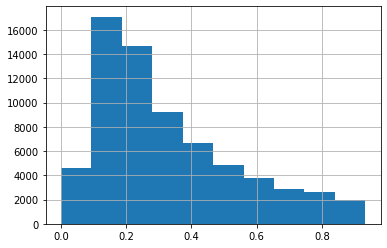

In [0]:
NN_frq.hist()

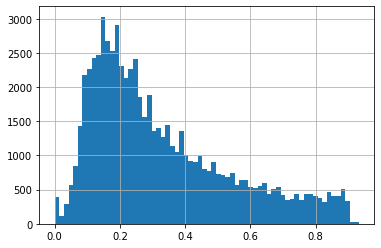

In [0]:
NN_frq.hist(bins='auto')

In [0]:
# I want to use more than 0.1
# NN이 적을수록 정보가 많은 것이기 때문에 사용하기 적합

m = NN_frq < 0.1
df_gt[m]

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,83,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_284819,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,NN,GG,GG,...,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,AA,GG,GG,GG,GG
S1_284820,CC,CC,GG,GG,GG,GG,CC,GC,CC,CC,CC,CC,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,CC,GG,GG,GG,GG,GG,GG,CC,NN,GG,NN,GC,CC,...,CC,CG,GG,GG,GG,GG,GG,GG,GG,CC,GG,CC,NN,GG,CG,GG,CC,CC,GG,CC,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG
S1_284829,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,NN,GG,GG,...,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG
S1_377146,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,TT,TT,NN,CC,TT,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,...,CC,CC,CC,TT,CC,CC,TT,CC,CC,CC,CC,CC,NN,CC,CT,TT,CC,CC,TT,CC,CC,NN,CC,NN,TT,TT,CC,CC,CC,CC,CC,CC,TT,TT,NN,TT,CC,CC,CC,CC
S1_702173,AA,AA,AA,AA,NN,AA,NN,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,NN,AA,AA,TT,TT,AA,AA,TT,NN,AA,AA,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,AA,NN,TT,AA,AA,TT,NN,AA,AA,AA,NN,NN,AA,TT,TT,AA,NN,TT,AA,AT,AA,NN,AA,TT,TT,AA,TT,TT,AA,AA,AA,TT,TT,NN,TT,AA,AA,AA,AA
S1_979900,TT,TT,TT,TT,NN,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,NN,TT,TT,TT,TT,TT,TT,TT,TT,TT,NN,NN,TT,TT,TT,TT,TT,TT,TT,TT,NN,TT,TT,TT,TT,...,TT,TT,CC,TT,TT,TT,TT,TT,TT,TT,TT,TT,NN,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,NN,TT,TT,TT,CC,CC,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT
S1_1425419,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,TT,CC,CT,TT,CC,NN,CC,CC,CC,CC,...,CC,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,TT,TT,TT,TT,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC
S1_1425452,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,NN,CC,CC,CC,CC,...,CC,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,CC,TT,TT,CC,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC
S1_1425456,TT,TT,TT,TT,TT,NN,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,NN,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,CC,CC,TT,CT,CC,TT,NN,TT,TT,TT,TT,...,TT,TT,CC,TT,TT,CC,TT,TT,TT,NN,TT,TT,NN,TT,TT,TT,NN,TT,TT,CC,CT,NN,TT,TT,TT,TT,CC,CC,CC,CC,TT,TT,TT,TT,CT,CT,TT,TT,TT,TT


In [0]:
df_gt_sub = df_gt[m]

In [0]:
df_gt_sub.head()

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,83,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_284819,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,NN,GG,GG,...,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,AA,GG,GG,GG,GG
S1_284820,CC,CC,GG,GG,GG,GG,CC,GC,CC,CC,CC,CC,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,CC,GG,GG,GG,GG,GG,GG,CC,NN,GG,NN,GC,CC,...,CC,CG,GG,GG,GG,GG,GG,GG,GG,CC,GG,CC,NN,GG,CG,GG,CC,CC,GG,CC,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG
S1_284829,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,NN,GG,GG,...,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG
S1_377146,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,TT,TT,NN,CC,TT,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,...,CC,CC,CC,TT,CC,CC,TT,CC,CC,CC,CC,CC,NN,CC,CT,TT,CC,CC,TT,CC,CC,NN,CC,NN,TT,TT,CC,CC,CC,CC,CC,CC,TT,TT,NN,TT,CC,CC,CC,CC
S1_702173,AA,AA,AA,AA,NN,AA,NN,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,NN,AA,AA,TT,TT,AA,AA,TT,NN,AA,AA,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,AA,NN,TT,AA,AA,TT,NN,AA,AA,AA,NN,NN,AA,TT,TT,AA,NN,TT,AA,AT,AA,NN,AA,TT,TT,AA,TT,TT,AA,AA,AA,TT,TT,NN,TT,AA,AA,AA,AA


In [0]:
df_gt_sub.to_pickle('./glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz.gt_sub.pkl')

In [0]:
# allele frq 구하기

df_gt_sub.loc[df_gt_sub.index[0]] #sample name, genotype

56-1         GG
56-2         GG
2            GG
3            GG
6            GG
7            GG
8            GG
9            GG
55-1         GG
55-2         GG
5-1          GG
5-2          GG
54-1         GG
54-2         GG
403          GG
406          GG
407          GG
243-1        GG
243-2        NN
410          GG
419          GG
420          GG
421          NN
300          GG
301          GG
422          GG
302          GG
423          GG
424          GG
303          GG
             ..
197          GG
198          GG
199          NN
91           GG
92           GG
94           GG
95           GG
96           GG
97           GG
98           GG
99           GG
238-1        GG
238-2        GG
21-Emgopa    GG
205-2        GG
205-1        NN
229-1        GG
165B         GG
165A         GG
229-2        GG
58-2         GG
58-1         GG
425-2        GG
425-1        GG
69-2         NN
69-1         AA
34-2         GG
34-1         GG
57-1         GG
57-2         GG
Name: S1_284819, Length:

In [0]:
[list(x) for x in df_gt_sub.loc[df_gt_sub.index[0]].values]

[['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['N', 'N'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['N', 'N'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['N', 'N'],
 ['G', 'G'],
 ['N', 'N'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['N', 'N'],
 ['G', 'G'],
 ['G', 'G'],
 ['N', 'N'],
 ['N', 'N'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['N', 'N'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],
 ['G', 'G'],

In [0]:
np.array([list(x) for x in df_gt_sub.loc[df_gt_sub.index[0]].values])

array([['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['N', 'N'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['N', 'N'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['N', 'N'],
       ['G', 'G'],
       ['N', 'N'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['G', 'G'],
       ['N', 'N'],
       ['G', 'G'],
       ['G', 'G'],
       ['N', 'N'],
       ['N', 'N'],
       ['G',

In [0]:
allele_pool = np.array([list(x) for x in df_gt_sub.loc[df_gt_sub.index[0]].values]).ravel()

In [0]:
from collections import Counter

In [0]:
Counter(allele_pool)

Counter({'A': 11, 'G': 667, 'N': 70})

In [0]:
dict(Counter(allele_pool)) # we will remove N

{'A': 11, 'G': 667, 'N': 70}

In [0]:
{x:y for x,y in dict(Counter(allele_pool)).items()}

{'A': 11, 'G': 667, 'N': 70}

In [0]:
{x:y for x,y in dict(Counter(allele_pool)).items() if x != 'N'}

{'A': 11, 'G': 667}

In [0]:
dicAllele2count = {x:y for x,y in dict(Counter(allele_pool)).items() if x != 'N'}

In [0]:
len(allele_pool)

748

In [0]:
dicAllele2frq = {x:y/len(allele_pool) for x,y in dict(Counter(allele_pool)).items() if x != 'N'}

In [0]:
dicAllele2frq

{'A': 0.014705882352941176, 'G': 0.8917112299465241}

In [0]:
# MAF : Minor Allele Frequency (여기선 A)

MAF = min(list(dicAllele2frq.values()))

In [0]:
MAF

0.014705882352941176

In [0]:
def get_maf(x) :
  allele_pool = np.array([list(i) for i in x.values]).ravel()
  dicAllele2frq = {x:y/len(allele_pool) for x,y in dict(Counter(allele_pool)).items() if x != 'N'}
  MAF = min(list(dicAllele2frq.values()))
  return MAF

In [0]:
df_gt_sub.head().apply(get_maf,axis=1) #genomics에 대한 논문에 나오는 용어에 대한 코딩들

ID
S1_284819    0.014706
S1_284820    0.239305
S1_284829    0.014706
S1_377146    0.106952
S1_702173    0.140374
dtype: float64

In [0]:
df_gt_sub['maf'] = df_gt_sub.progress_apply(get_maf,axis=1)

TypeError: ignored

In [0]:
df_gt_sub.loc['S4_48317828'] #S4_48317828에 이상한 value값이 있음 nannn 이렇게 생긴..

56-1         nannan
56-2         nannan
2            nannan
3            nannan
6              NGNG
7            nannan
8            nannan
9              NGNG
55-1         nannan
55-2         nannan
5-1              NN
5-2              NN
54-1         nannan
54-2         nannan
403          nannan
406          nannan
407          nannan
243-1          NGNG
243-2            NN
410          nannan
419          nannan
420            NGNG
421           nanNG
300            NGNG
301            NGNG
422            NGNG
302              NN
423            NGNG
424          nannan
303            NGNG
              ...  
197            NGNG
198              NN
199              NN
91           nannan
92           nannan
94           nannan
95               NN
96           nannan
97           nannan
98           nannan
99           nannan
238-1          NGNG
238-2            NN
21-Emgopa        NN
205-2          NGNG
205-1          NGNG
229-1          NGNG
165B         nannan
165A         nannan


In [0]:
Indels = df_gt.progress_apply(lambda x : max([len(i) for i in set(list(x))]), axis=1)

In [0]:
m1 = Indels <= 2

In [0]:
df_gt_sub = df_gt[m&m1]

In [0]:
df_gt_sub['maf'] = df_gt_sub.progress_apply(get_maf, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_gt_sub.head()

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2,maf
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_284819,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,NN,GG,GG,...,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,AA,GG,GG,GG,GG,0.014706
S1_284820,CC,CC,GG,GG,GG,GG,CC,GC,CC,CC,CC,CC,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,CC,GG,GG,GG,GG,GG,GG,CC,NN,GG,NN,GC,CC,...,CG,GG,GG,GG,GG,GG,GG,GG,CC,GG,CC,NN,GG,CG,GG,CC,CC,GG,CC,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG,0.239305
S1_284829,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,NN,GG,GG,...,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG,0.014706
S1_377146,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,TT,TT,NN,CC,TT,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,...,CC,CC,TT,CC,CC,TT,CC,CC,CC,CC,CC,NN,CC,CT,TT,CC,CC,TT,CC,CC,NN,CC,NN,TT,TT,CC,CC,CC,CC,CC,CC,TT,TT,NN,TT,CC,CC,CC,CC,0.106952
S1_702173,AA,AA,AA,AA,NN,AA,NN,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,NN,AA,AA,TT,TT,AA,AA,TT,NN,AA,AA,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,NN,TT,AA,AA,TT,NN,AA,AA,AA,NN,NN,AA,TT,TT,AA,NN,TT,AA,AT,AA,NN,AA,TT,TT,AA,TT,TT,AA,AA,AA,TT,TT,NN,TT,AA,AA,AA,AA,0.140374


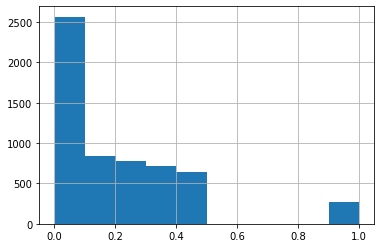

In [0]:
df_gt_sub['maf'].hist()

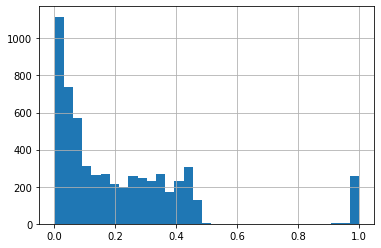

In [0]:
df_gt_sub['maf'].hist(bins = 'auto')

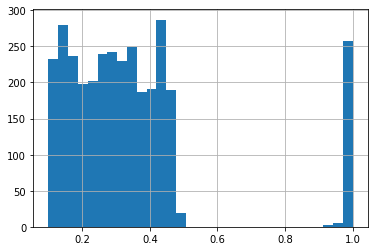

In [0]:
m = df_gt_sub['maf'] > 0.1
df_gt_sub[m]['maf'].hist(bins='auto')

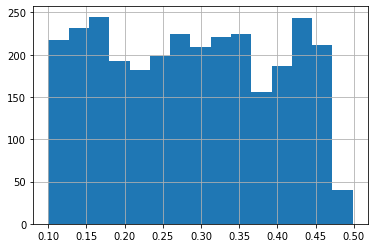

In [0]:
m = df_gt_sub['maf'] > 0.1
m1 = df_gt_sub['maf'] < 0.8
df_gt_sub[m&m1]['maf'].hist(bins='auto')

In [0]:
df_gt_sub_filtered_with_maf = df_gt_sub[m&m1]

In [0]:
df_gt_sub_filtered_with_maf.to_pickle('./glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz.gt_sub.filterbyMAF.pkl')

In [0]:
df_gt_sub_filtered_with_maf.head()

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2,maf
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_284820,CC,CC,GG,GG,GG,GG,CC,GC,CC,CC,CC,CC,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,CC,GG,GG,GG,GG,GG,GG,CC,NN,GG,NN,GC,CC,...,CG,GG,GG,GG,GG,GG,GG,GG,CC,GG,CC,NN,GG,CG,GG,CC,CC,GG,CC,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG,0.239305
S1_377146,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,TT,TT,NN,CC,TT,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,...,CC,CC,TT,CC,CC,TT,CC,CC,CC,CC,CC,NN,CC,CT,TT,CC,CC,TT,CC,CC,NN,CC,NN,TT,TT,CC,CC,CC,CC,CC,CC,TT,TT,NN,TT,CC,CC,CC,CC,0.106952
S1_702173,AA,AA,AA,AA,NN,AA,NN,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,NN,AA,AA,TT,TT,AA,AA,TT,NN,AA,AA,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,NN,TT,AA,AA,TT,NN,AA,AA,AA,NN,NN,AA,TT,TT,AA,NN,TT,AA,AT,AA,NN,AA,TT,TT,AA,TT,TT,AA,AA,AA,TT,TT,NN,TT,AA,AA,AA,AA,0.140374
S1_1425419,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,TT,CC,CT,TT,CC,NN,CC,CC,CC,CC,...,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,TT,TT,TT,TT,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC,0.176471
S1_1425452,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,NN,CC,CC,CC,CC,...,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,CC,TT,TT,CC,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC,0.128342


In [0]:
df_gt_sub_filtered_with_maf.shape

(2984, 375)

In [0]:
df_gt.shape

(68301, 374)

---